# Project US Speech Analysis 

## Part 5: Calculate sentiment scores across speeches

# Introduction
In Part IV, we performed text analysis by extracting the POS tags from the speech and tabulating them for calculation of a metric for political persuasion.

In this final Part, we wrap up by analysing the sentiment of the speeches and how the sentiment evolves over time.
1. Import the required libraries
2. Read the CSV from Part III
3. Prepare the DataFrame for analysis
4. Test out the analysis of one year's speech
5. Analysing the rest of the years' speeches

In [1]:
# Step 1: Import libraries
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

In [2]:
# Step 2: Read the CSV from Part III
df = pd.read_csv('Speech_data_extended.csv')
df

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,Flesch_score
0,obama2010.txt,Obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575
1,obama2011.txt,Obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806
2,obama2012.txt,Obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203,"['Mr', ' Speaker, Mr', ' Vice President, membe...",518,81.472973,17.344065,26.228014
3,obama2013.txt,Obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.551648,14.187551,52.062427
4,obama2014.txt,Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649
5,obama2015.txt,Obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",466,86.412017,13.518314,56.194377
6,obama2016.txt,Obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"['Mr', ' Speaker, Mr', "" Vice President, Membe...",305,102.186885,17.441406,25.062509
7,trump2018.txt,Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",323,94.294118,13.843611,51.034490
8,trump2019.txt,Trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"['Madam Speaker, Mr', ' Vice President, Member...",298,103.842282,14.799100,44.106260
9,trump2020.txt,Trump,2020,Thank you very much. Thank you. Thank you ve...,39648,"['Thank you very much', ' Thank you', ' Than...",557,71.181329,16.381695,33.439536


### Step 3: Turn the values in 'sentences' column back into a list
The downside of exporting a DataFrame containing a list is that when you read the CSV back into a DataFrame, the entire list becomes a string, i.e.

"['a', 'b', 'c']" rather than ['a', 'b', 'c']

In [3]:
# Step 3: Turn your string list into a list back
df['sentences'] = df['sentences'].apply(lambda x: ast.literal_eval(x))
type(df['sentences'][0])

list

## Analyze the sentiment of Obama's 2010 speech
Before we analyze all of the speeches, we'll start with Obama's 2010 speech first. 

In [4]:
# Step 4: Create a DataFrame from Obama's 2010 speech
df_obama_2010 = pd.DataFrame(df['sentences'][0], columns = ['sentence'])
df_obama_2010

,sentence
0,"Madam Speaker, Vice President Biden, members o..."
1,"For 220 years, our leaders have fulfilled thi..."
2,They've done so during periods of prosperity ...
3,And they've done so in the midst of war and d...
4,\n\nIt's tempting to look back on these moment...
...,...
557,)\n\nThank you
558,God bless you
559,And God bless the United States of America
560,(Applause


In [5]:
# Step 5: Get the compound score of each row's sentence
score = []
analyzer = SentimentIntensityAnalyzer()
for sentence in df_obama_2010['sentence']:
    vs = analyzer.polarity_scores(sentence)
    score.append(vs['compound'])
    
score

[0.0,
 0.4215,
 0.4215,
 -0.1779,
 0.7184,
 -0.564,
 -0.0516,
 0.7506,
 -0.7717,
 0.0,
 0.0,
 -0.9322,
 -0.7003,
 -0.3182,
 -0.6249,
 -0.5719,
 0.0,
 0.0,
 0.4019,
 -0.1761,
 -0.5106,
 -0.3182,
 -0.1531,
 0.0,
 -0.3612,
 0.0,
 0.0,
 -0.0772,
 0.0,
 -0.7717,
 -0.3291,
 -0.4404,
 0.0,
 0.0,
 -0.296,
 0.2023,
 -0.1531,
 0.8225,
 0.296,
 -0.5106,
 -0.4201,
 0.235,
 0.4854,
 0.8849,
 0.4215,
 0.5106,
 0.0,
 0.0,
 0.3944,
 0.4939,
 0.4215,
 0.5859,
 0.0,
 -0.5834,
 -0.3412,
 -0.4588,
 -0.34,
 -0.6369,
 -0.6369,
 0.4215,
 0.4939,
 0.7876,
 -0.4404,
 0.3947,
 0.1531,
 0.7893,
 0.0,
 0.0,
 0.4215,
 0.0,
 0.0,
 0.4215,
 -0.2755,
 0.9231,
 0.4215,
 0.765,
 -0.1027,
 -0.2732,
 -0.2732,
 0.4215,
 -0.2732,
 -0.2732,
 0.2732,
 -0.2732,
 0.4215,
 0.4215,
 0.7184,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.0,
 0.4215,
 0.5859,
 0.0,
 0.4215,
 0.0,
 -0.296,
 0.4215,
 0.0,
 0.4215,
 -0.3818,
 0.0,
 0.0,
 -0.0772,
 0.0,
 0.3612,
 -0.2732,
 0.7003,
 0.0,
 -0.0772,
 0.0,
 0.4215,
 0.5994,
 0.4215,
 0.6808,
 0.7003,
 0.3

In [6]:
df_obama_2010['compound'] = score
df_obama_2010

,sentence,compound
0,"Madam Speaker, Vice President Biden, members o...",0.0000
1,"For 220 years, our leaders have fulfilled thi...",0.4215
2,They've done so during periods of prosperity ...,0.4215
3,And they've done so in the midst of war and d...,-0.1779
4,\n\nIt's tempting to look back on these moment...,0.7184
...,...,...
557,)\n\nThank you,0.3612
558,God bless you,0.5994
559,And God bless the United States of America,0.7717
560,(Applause,0.4215


## Sentence length normalization
Next, because we're going to compare the speeches from different years, we will have to normalize the positions of the sentence in the speech. 

In [7]:
# Step 6: Create the index column
df_obama_2010['index'] = df_obama_2010.index
df_obama_2010

,sentence,compound,index
0,"Madam Speaker, Vice President Biden, members o...",0.0000,0
1,"For 220 years, our leaders have fulfilled thi...",0.4215,1
2,They've done so during periods of prosperity ...,0.4215,2
3,And they've done so in the midst of war and d...,-0.1779,3
4,\n\nIt's tempting to look back on these moment...,0.7184,4
...,...,...,...
557,)\n\nThank you,0.3612,557
558,God bless you,0.5994,558
559,And God bless the United States of America,0.7717,559
560,(Applause,0.4215,560


### Step 7: Normalize the values in the index column

In [8]:
# Step 7: Normalize your index column
df_obama_2010['index'] = df_obama_2010['index'] / df_obama_2010.index[-1]
df_obama_2010

,sentence,compound,index
0,"Madam Speaker, Vice President Biden, members o...",0.0000,0.000000
1,"For 220 years, our leaders have fulfilled thi...",0.4215,0.001783
2,They've done so during periods of prosperity ...,0.4215,0.003565
3,And they've done so in the midst of war and d...,-0.1779,0.005348
4,\n\nIt's tempting to look back on these moment...,0.7184,0.007130
...,...,...,...
557,)\n\nThank you,0.3612,0.992870
558,God bless you,0.5994,0.994652
559,And God bless the United States of America,0.7717,0.996435
560,(Applause,0.4215,0.998217


### Step 8: Plot 'index' against 'compound'
Let's see how the sentiment score varies across the speech.

Plot index vs compound for Obama's 2010 speech.

<AxesSubplot:xlabel='index'>

<Figure size 1152x576 with 0 Axes>

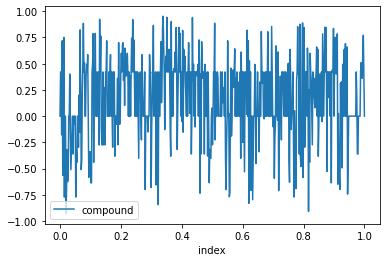

In [9]:
# Step 8: Plot index vs compound
plt.figure(figsize = (16,8))
df_obama_2010.plot('index', 'compound')

## Smoothing the curve
The curve looks messy, and it is hard to interpret it. As such, we shall smooth the curve using interpolation.

In the interpolation of the speech score curve, we will use only 20 points in between 0.0 and 1.0. The idea is to tweak the number of points to plot in the interpolated curve for maximum readability and interpretation.

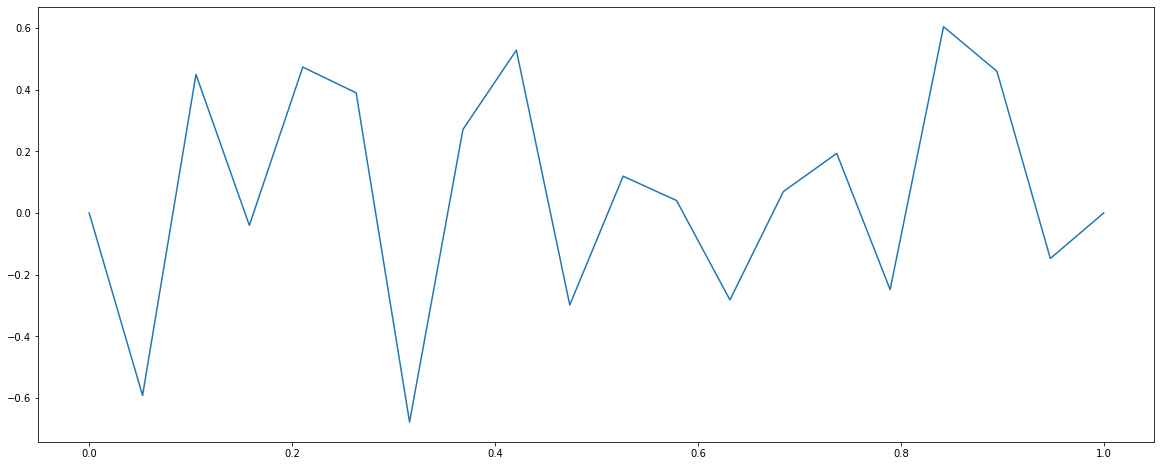

In [10]:
# Step 9: Plot an interpolated smooth curve for Obama's 2010 speech
from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(0.0,1.0, 20)
spl = make_interp_spline(df_obama_2010['index'], df_obama_2010['compound'], k =3)
smooth_curve = spl(xnew)
plt.figure(figsize = (20,8))
plt.plot(xnew, smooth_curve)

### Step 10: Create a list of processed DataFrames
We will loop through the 'sentences' column, and perform the same operations on each sentence. 

In [11]:
# Step 10: Create a list of processed DataFrames
dataframe_list = []
for sentence in df['sentences']:
    new_df= pd.DataFrame(sentence, columns = ['sentence'])
    score = []
    analyzer = SentimentIntensityAnalyzer()
    for sen in new_df['sentence']:
        vs = analyzer.polarity_scores(sen)
        score.append(vs['compound'])
    new_df['compound'] = score
    new_df['index'] = new_df.index
    new_df['index'] = new_df['index'] / new_df.index[-1]
    dataframe_list.append(new_df)

### Step 11: Plot the 'compound' scores from all years
Now that you have a list of DataFrames, perform Step 9 on all of the DataFrames in the list of DataFrames that you created in Step 10.

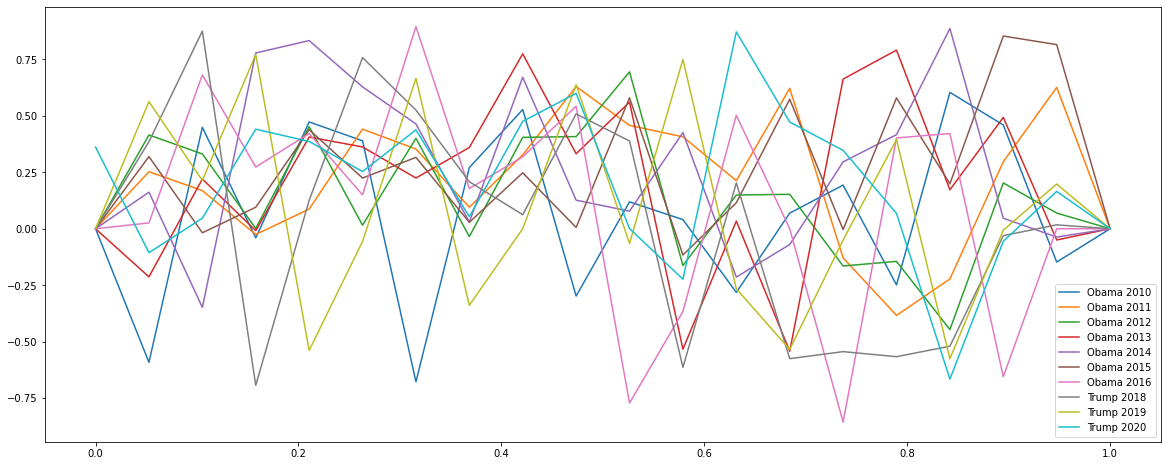

In [12]:
# Step 11: Plot the interpolated smooth curves of all speeches
plt.figure(figsize = (20,8))
#plt.legend(['Obama 2010','Obama 2011','Obama 2012','Obama 2013','Obama 2014','Obama 2015','Obama 2016', 'Trump 2018','Trump 2019','Trump 2020'])
for dataframe in dataframe_list:
    index = dataframe['index']
    compound = dataframe['compound']
    xnew = np.linspace(0.0,1.0, 20)
    spl = make_interp_spline(index, compound, k =3)
    smooth_curve = spl(xnew)
    plt.plot(xnew, smooth_curve)
plt.legend(['Obama 2010','Obama 2011','Obama 2012','Obama 2013','Obama 2014','Obama 2015','Obama 2016', 'Trump 2018','Trump 2019','Trump 2020'])

It's not to pretty to look at, but generally the sentiment scores oscillate throughout the speeches and the peaks and valleys happen around the same spots.